In [486]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style = 'darkgrid', font_scale = 1.2)
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 150 
mpl.rcParams["figure.figsize"] = (12, 5)

<span style="font-size:16px;">Luca Enrico Corrocher</span>
# VideoGames sale
### analisi delle vendite dal 1980 


## Perchè?

Questo dataset contiene una lista di videogiochi che hanno venduto almeno 100,000 copie.  


In [487]:
vg = pd.read_csv("data/vgsales.csv")
vg.drop('Rank',axis=1, inplace=True)
#Correggo formattazione anno, tolgo i NaN e i valori oltre il 2017
vg.dropna(subset=['Year'], inplace=True)
vg = vg.drop(vg[vg['Year'] > 2017].index)
vg['Year'] = vg['Year'].astype(int)

vg.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [488]:
numero_di_giochi = vg['Name'].unique().shape[0]
print("Il numero di videogiochi presenti nel data set: " + str(numero_di_giochi))

anno_max = vg['Year'].max() 
anno_min = vg['Year'].min()
print("L'intervallo di anni coperti dal data set: " + str(anno_min)+" - " + str(anno_max))

numero_di_generi = vg['Genre'].unique().shape[0]
print("Il numero di generi presenti nel data set: " + str(numero_di_generi))

numero_di_piattaforme = vg['Platform'].unique().shape[0]
print("Il numero di piattaforme presenti nel data set: " + str(numero_di_piattaforme))

Il numero di videogiochi presenti nel data set: 11359
L'intervallo di anni coperti dal data set: 1980 - 2017
Il numero di generi presenti nel data set: 12
Il numero di piattaforme presenti nel data set: 31


<span style="font-size:12px;">Scaricato da Keggle: https://www.kaggle.com/datasets/gregorut/videogamesales/data</span>

In [489]:
#Cambio il nome per esigenze di visualizzazione
vg['Genre'] = vg['Genre'].replace('Role-Playing', 'RP')

In [490]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16326 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16326 non-null  object 
 1   Platform      16326 non-null  object 
 2   Year          16326 non-null  int64  
 3   Genre         16326 non-null  object 
 4   Publisher     16290 non-null  object 
 5   NA_Sales      16326 non-null  float64
 6   EU_Sales      16326 non-null  float64
 7   JP_Sales      16326 non-null  float64
 8   Other_Sales   16326 non-null  float64
 9   Global_Sales  16326 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


DOMANDE:
1) Quali sono i generi più venduti?
2) Qual'è la piattaforma più redditizia?
3) Qual'è l'annata migliore e cosa la carattrizza?
4) Quali sono le caratteristiche delle vendite per regione e come influenzano le vendite globali?
5) Esiste una correlazione tra le vendite dei videogiochi e i biglietti dei film?

## Studio dei generi

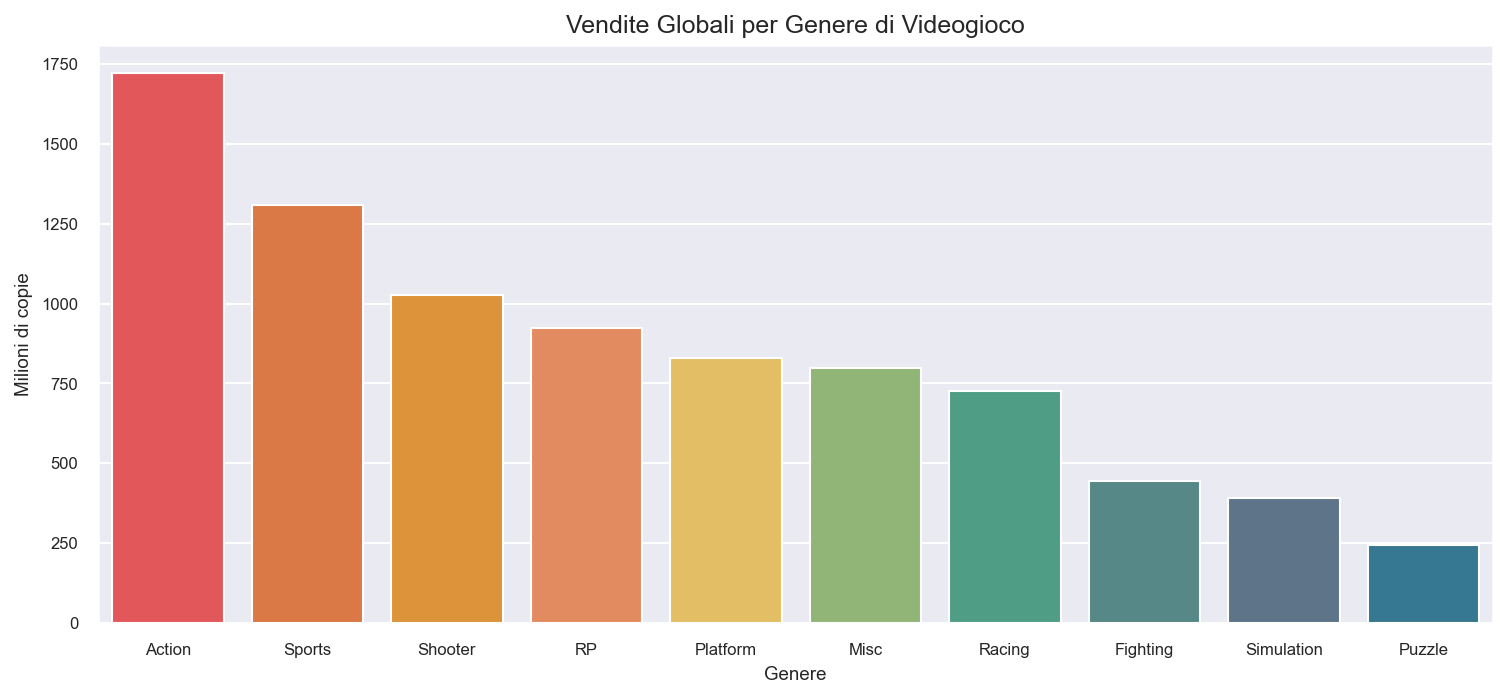

In [ ]:
#creo una serie con index il genere e values la somma delle vendite per ogni genere
somma_per_genere = vg.groupby('Genre')['Global_Sales'].sum()
#ordino
somma_per_genere =  somma_per_genere.sort_values().nlargest(10)

#palette cromatica
palette = sns.color_palette(["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"])

# Creazione del grafico 
plt.figure(figsize=(12, 5))  
sns.barplot(x=somma_per_genere.index, y=somma_per_genere.values, palette=palette, hue=palette, legend=False)

# Personalizzazione delle etichette
plt.xticks( fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel("Genere", fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.title("Vendite Globali per Genere di Videogioco", fontsize=12)

plt.show()

## Studio delle piattaforme

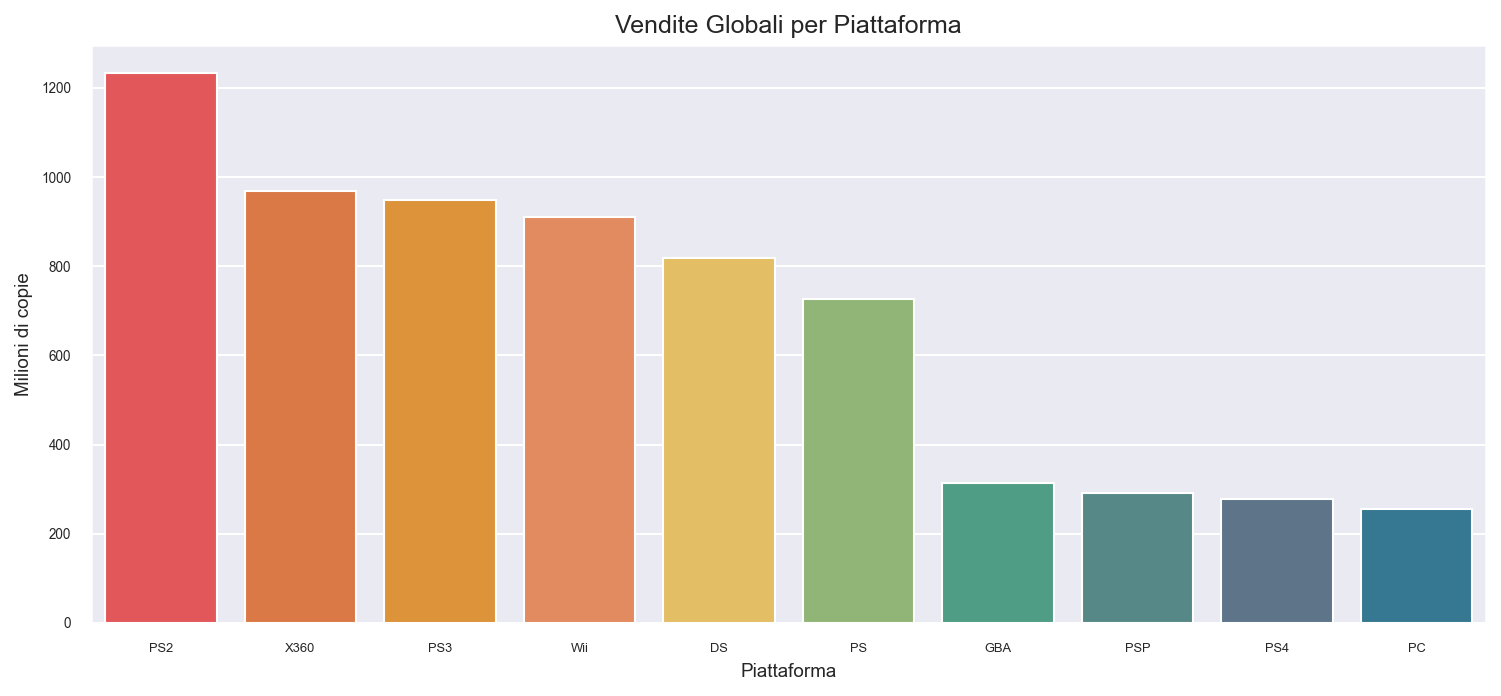

In [492]:
somma_per_piattaforma = vg.groupby('Platform')['Global_Sales'].sum()

somma_per_piattaforma = somma_per_piattaforma.nlargest(10)


# Grafico
sns.barplot(x= somma_per_piattaforma.index,y= somma_per_piattaforma.values, palette=palette, hue=palette, legend=False)
# Personalizzazione delle etichette
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.xlabel("Piattaforma", fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.title("Vendite Globali per Piattaforma", fontsize=12)

plt.show()


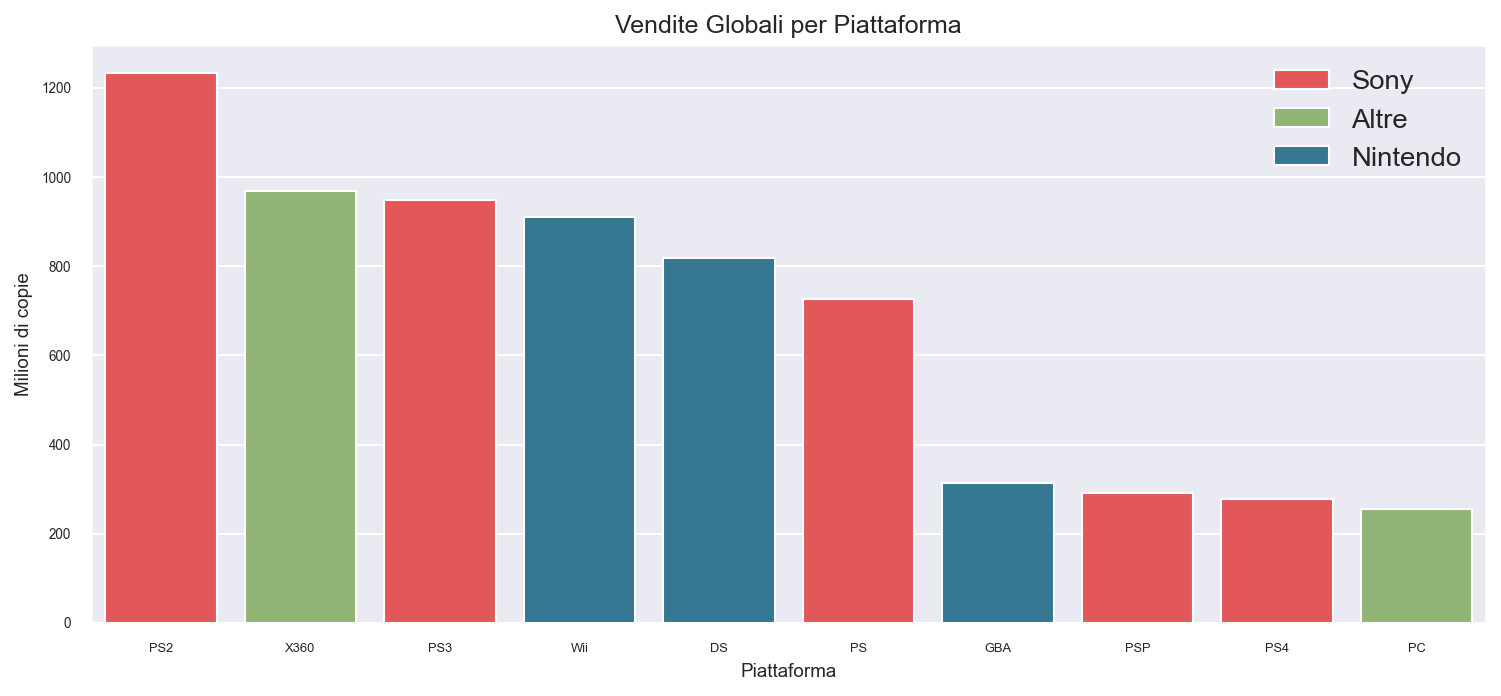

In [493]:
# Definisco le piattaforme da evidenziare
piattaforme_di_Sony= ["PS2", "PS3", "PS", "PSP", "PS4"]  
piattaforme_di_Nintendo = ["Wii", "DS", "GBA"] 

# Definisco hue
categoria_piattaforma = [
    'Sony' if platform in piattaforme_di_Sony else
    'Nintendo' if platform in piattaforme_di_Nintendo else
    'Altre'
    for platform in somma_per_piattaforma.index
]

# Definisco la palette
palette_filtro = {
    'Sony': "#f94144", 
    'Nintendo': "#277da1", 
    'Altre': "#90be6d"
}
# Grafico
sns.barplot(x= somma_per_piattaforma.index,y= somma_per_piattaforma.values, hue=categoria_piattaforma, palette=palette_filtro, legend=True)

# Personalizzazione delle etichette
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.xlabel("Piattaforma", fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.title("Vendite Globali per Piattaforma", fontsize=12)


plt.show()


In [ ]:
# Calcolo il numero di videogiochi per le piattaforme
numero_esclusive_sony = (vg[vg["Platform"] == "PS2"].shape[0] +
                         vg[vg["Platform"] == "PS3"].shape[0] +
                         vg[vg["Platform"] == "PS"].shape[0] +
                         vg[vg["Platform"] == "PSP"].shape[0] +
                         vg[vg["Platform"] == "PS4"].shape[0])

numero_esclusive_nintendo = (vg[vg["Platform"] == "Wii"].shape[0] +
                             vg[vg["Platform"] == "DS"].shape[0] +
                             vg[vg["Platform"] == "GBA"].shape[0])

numero_esclusive_X360 = vg[vg["Platform"] == "X360"].shape[0]
numero_esclusive_PC = vg[vg["Platform"] == "PC"].shape[0]

print("Numero di esclusive:")
print(f"Sony: {numero_esclusive_sony}")
print(f"Nintendo: {numero_esclusive_nintendo}")
print(f"X360: {numero_esclusive_X360}")
print(f"PC: {numero_esclusive_PC}")



Numero di esclusive:
Sony: 6153
Nintendo: 4233
X360: 1235
PC: 943


In [523]:
# Somma delle vendite per le piattaforme
vendite_sony = vg[vg['Platform'].isin(piattaforme_da_Sony)]['Global_Sales'].sum()
vendite_nintendo = vg[vg['Platform'].isin(piattaforme_da_Nintendo)]['Global_Sales'].sum()
vendite_X360 = vg[vg['Platform']=="X360"]['Global_Sales'].sum()
vendite_PC = vg[vg['Platform']=="PC"]['Global_Sales'].sum()

# Stampa dei risultati
print("Vendite globali:")
print(f"Sony: {vendite_sony:.2f} milioni")
print(f"Nintendo: {vendite_nintendo:.2f} milioni")
print(f"X360: {vendite_X360:.2f} milioni")
print(f"PC: {vendite_PC:.2f} milioni")


Vendite globali:
Sony: 3480.01 milioni
Nintendo: 2042.04 milioni
X360: 969.61 milioni
PC: 255.05 milioni


## Studio annata migliore

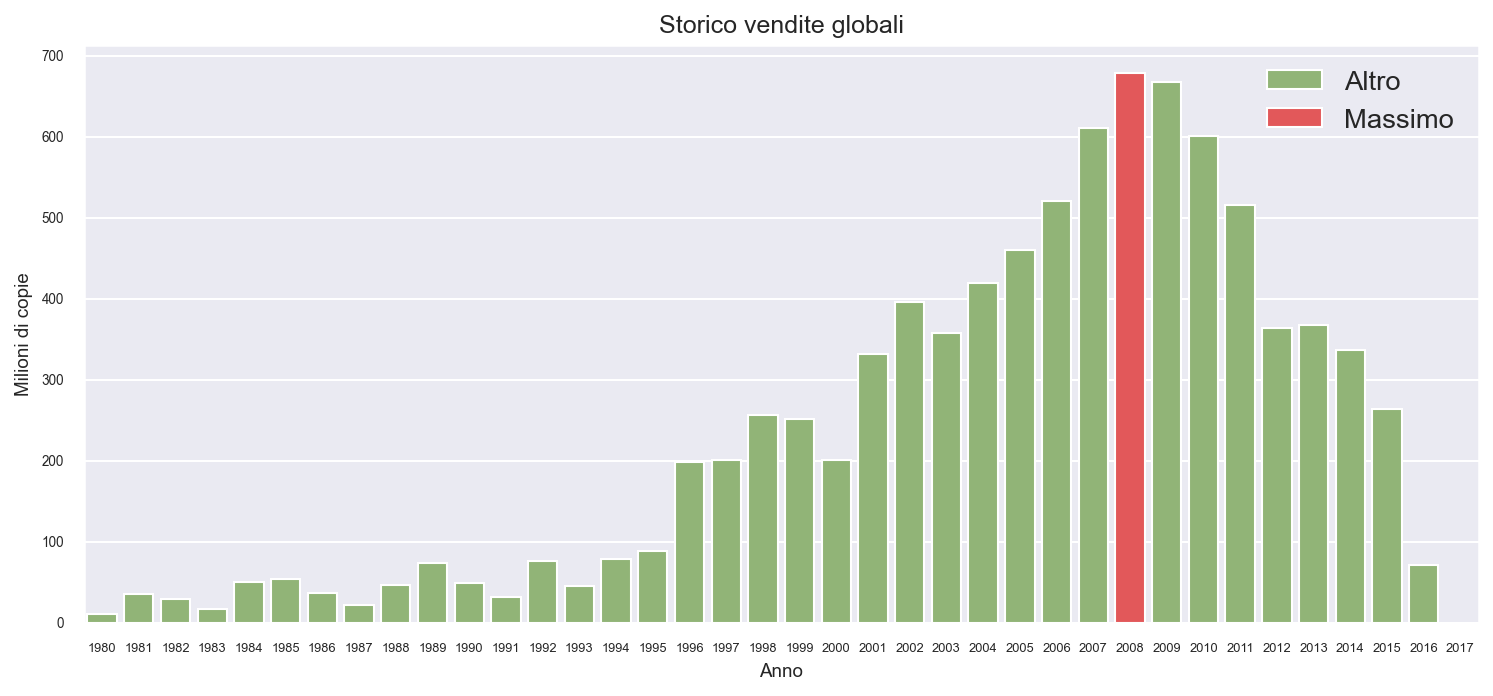

In [ ]:
# Somma delle vendite globali per anno
somma_per_anno = vg.groupby('Year')['Global_Sales'].sum()

max_sales = somma_per_anno.max()
max_year = somma_per_anno.idxmax()
# Definisco hue
hue_filtro_max = ['Massimo' if anno == max_year else 'Altro' for anno in somma_per_anno.index]
# Definisco la palette
palette_filtro_max = {'Massimo' : "#f94144", 'Altro' : "#90be6d"}
# Creo il grafico
fig, ax = plt.subplots()
sns.barplot(x=somma_per_anno.index, y=somma_per_anno.values, palette=palette_filtro_max, hue=hue_filtro_max,legend=True, ax=ax)

# Personalizzazione delle etichette
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.ylabel("Milioni di copie", fontsize=9)
plt.xlabel("Anno", fontsize=9)
plt.title("Storico vendite globali", fontsize=12)
plt.show()


In [528]:
# Calcolo l'anno con il maggior numero di vendite globali
anno_con_più_vendite = somma_per_anno.idxmax()

# Filtra i giochi rilasciati in quell'anno
giochi_anno_con_più_vendite = vg[vg['Year'] == anno_con_più_vendite]

# Conta quanti videogiochi sono usciti in quell'anno -> numero di righe
num_giochi = giochi_anno_con_più_vendite.shape[0]

# Ordina per vendite globali (decrescente)
giochi_top3 = giochi_anno_con_più_vendite.sort_values(by='Global_Sales', ascending=False).head(3)

# Stampa i risultati
print(f"\nAnno con il maggior numero di vendite globali: {anno_con_più_vendite}")
print(f"Numero di videogiochi pubblicati: {num_giochi}\n\n")
print("Top 3 videogiochi:")
print(giochi_top3[['Name', 'Platform', 'Global_Sales']].to_string(index=False))






Anno con il maggior numero di vendite globali: 2008
Numero di videogiochi pubblicati: 1428


Top 3 videogiochi:
                   Name Platform  Global_Sales
         Mario Kart Wii      Wii         35.82
Super Smash Bros. Brawl      Wii         13.04
    Grand Theft Auto IV     X360         11.02


## Studio per regione

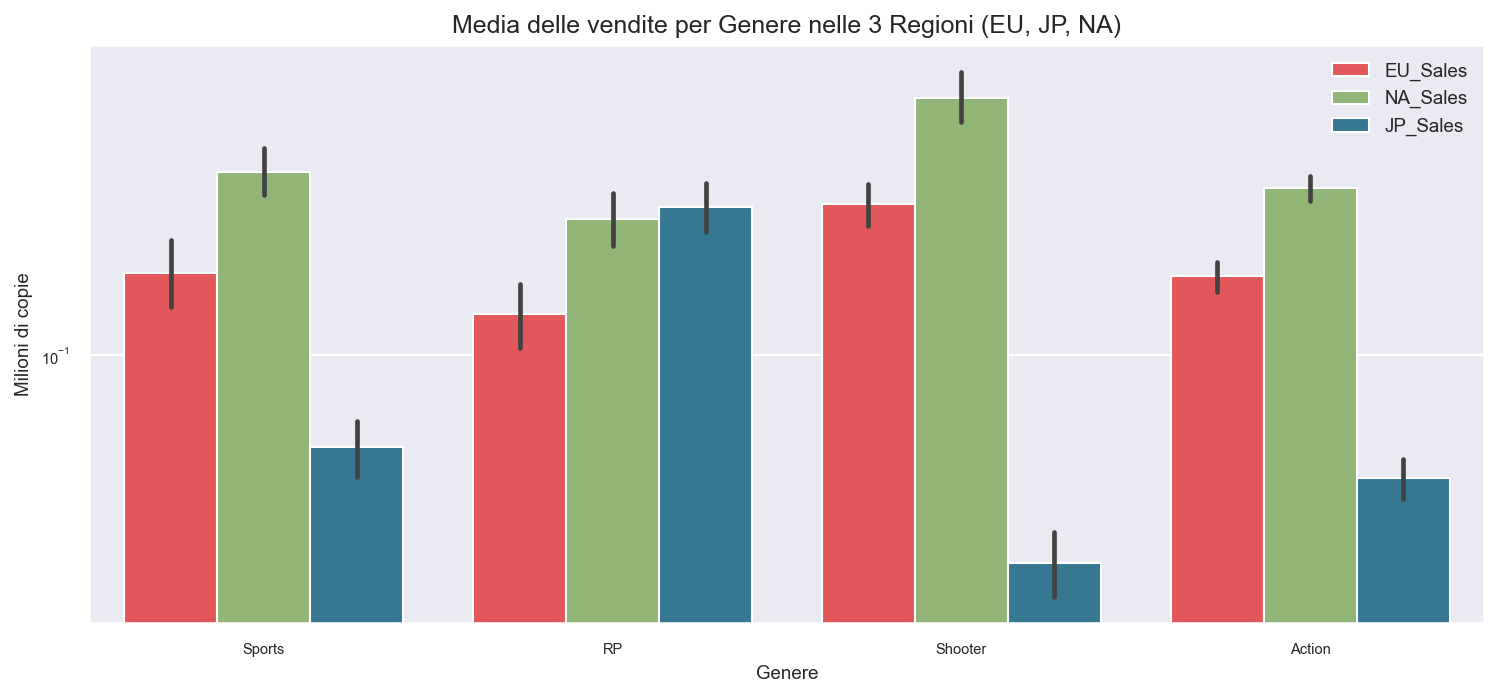

In [529]:
# Scelgo i generi da analizzare, top 3 generi
filtro = "Action", "RP", "Sports", "Shooter"
top_generi = vg[vg['Genre'].isin(filtro)]

# Reshape del DataFrame per unire le vendite in un'unica colonna 'Sales' e creare una colonna per la regione
dati_melted = top_generi.melt(id_vars=["Genre"], value_vars=["EU_Sales", "NA_Sales", "JP_Sales"], 
                        var_name="Regione", value_name="Vendite")


# Grafico
sns.barplot(data=dati_melted, x='Genre', y='Vendite', hue='Regione', palette=["#f94144","#90be6d","#277da1"])

# Personalizzazione delle etichette
plt.title('Media delle vendite per Genere nelle 3 Regioni (EU, JP, NA)', fontsize=12)
plt.legend(fontsize=9)
plt.xlabel('Genere', fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')

plt.show()


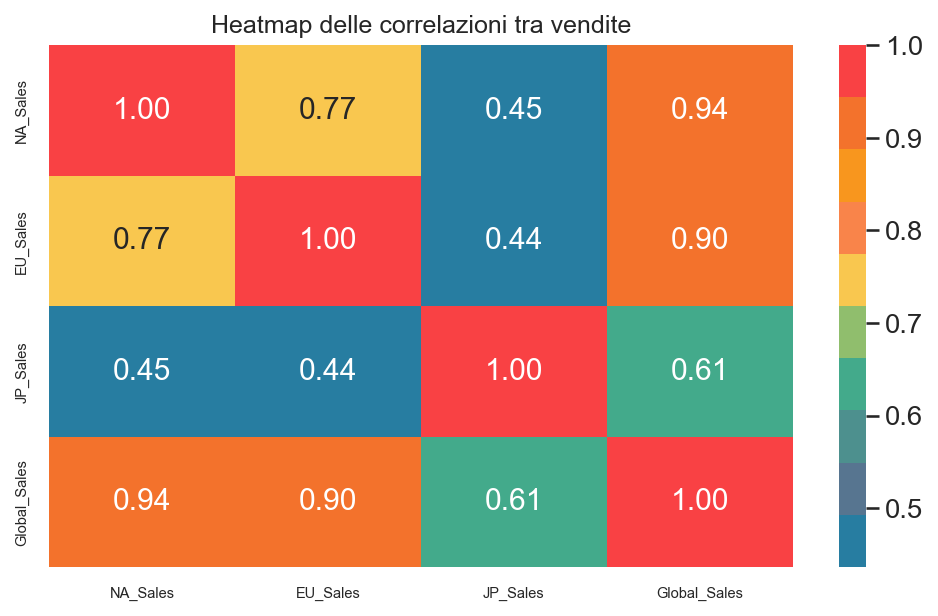

In [531]:
import numpy as np
# Calcolo la correlazione
correlation_matrix = vg[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]].corr()
# Correggo l'ordine dei colori
palette_inversa = palette[::-1]
# Creazione della heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap=palette_inversa, fmt=".2f")

# Personalizzazione delle etichette
plt.title("Heatmap delle correlazioni tra vendite", fontsize=12)
plt.subplots_adjust(bottom=0.3)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()


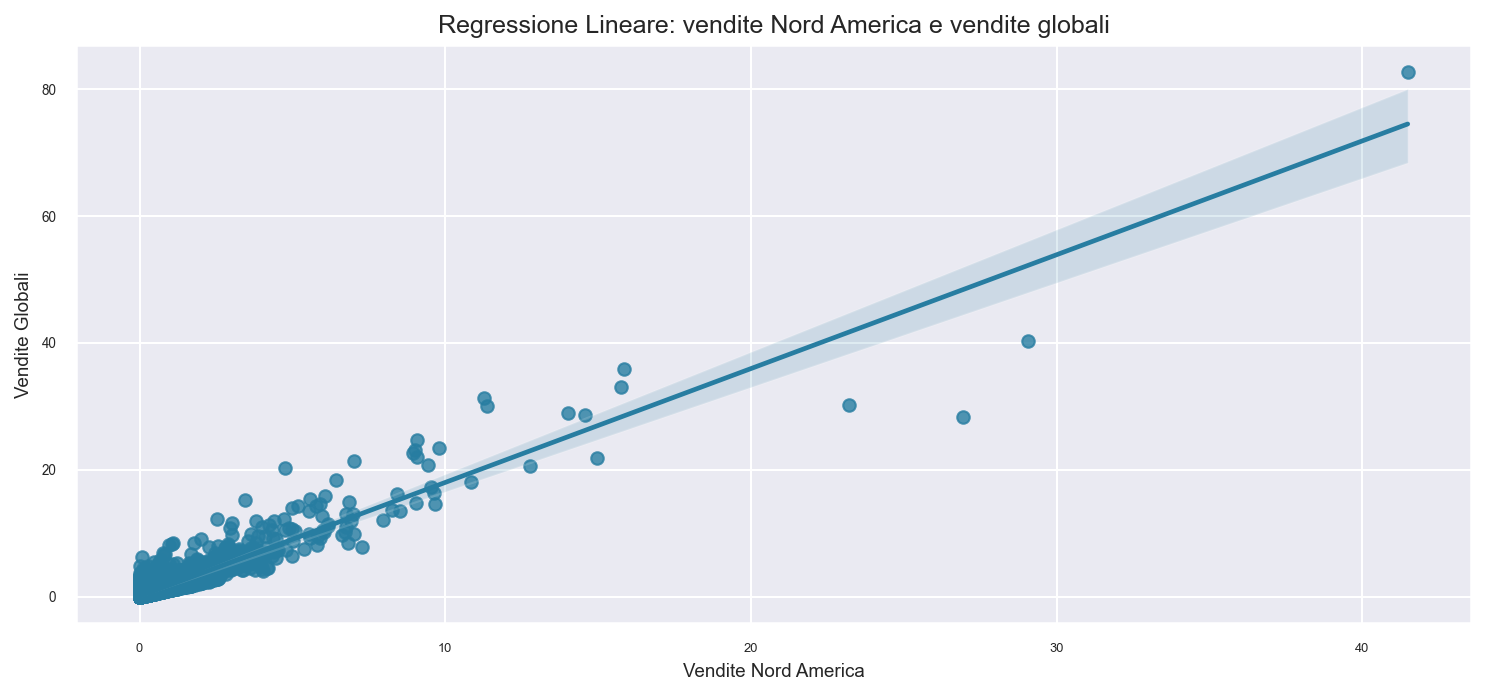

In [500]:
# Grafico regressione
sns.regplot(x=vg["NA_Sales"], y=vg["Global_Sales"], color="#277da1")

# Personalizzazione delle etichette
plt.title("Regressione Lineare: vendite Nord America e vendite globali", fontsize=12)
plt.xlabel("Vendite Nord America", fontsize=9)
plt.ylabel("Vendite Globali", fontsize=9)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.show()

## Confronto film

Questo dataset raccoglie informazioni sui film suddivisi per genere, rilasciati tra il 1995 e il 2018.

In [501]:
mv = pd.read_csv("data/mvGenre.csv")
# Rimuovo la colonna 'index' e trasformo le vendite in milioni
mv.drop('index',axis=1, inplace=True)
mv['Tickets Sold'] = (mv['Tickets Sold'] / 1_000_000).round(2)
mv.head()

,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,Adventure,1995,29,771507571,177.36,1590901682,Toy Story,150148222,3.096160e+08
1,Adventure,1996,34,1290490033,291.97,2618935504,Independence Day,306169255,6.213435e+08
2,Adventure,1997,23,881902843,192.14,1723457085,Men in Black,250650052,4.898324e+08
3,Adventure,1998,29,1614467732,344.24,3087798481,Armageddon,201578182,3.855344e+08
4,Adventure,1999,27,1612432107,317.41,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [513]:
anno_max_film = mv['Year'].max() 
anno_min_film = mv['Year'].min()
print("L'intervallo di anni coperti dal data set: " + str(anno_min_film)+" - " + str(anno_max_film))

numero_di_generi = mv['Genre'].unique().shape[0]
print("Il numero di generi presenti nel data set: " + str(numero_di_generi))


L'intervallo di anni coperti dal data set: 1995 - 2018
Il numero di generi presenti nel data set: 14


<span style="font-size:12px;">Scaricato da Keggle: https://www.kaggle.com/datasets/thedevastator/film-genre-statistics#</span>

In [502]:
mv['Genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

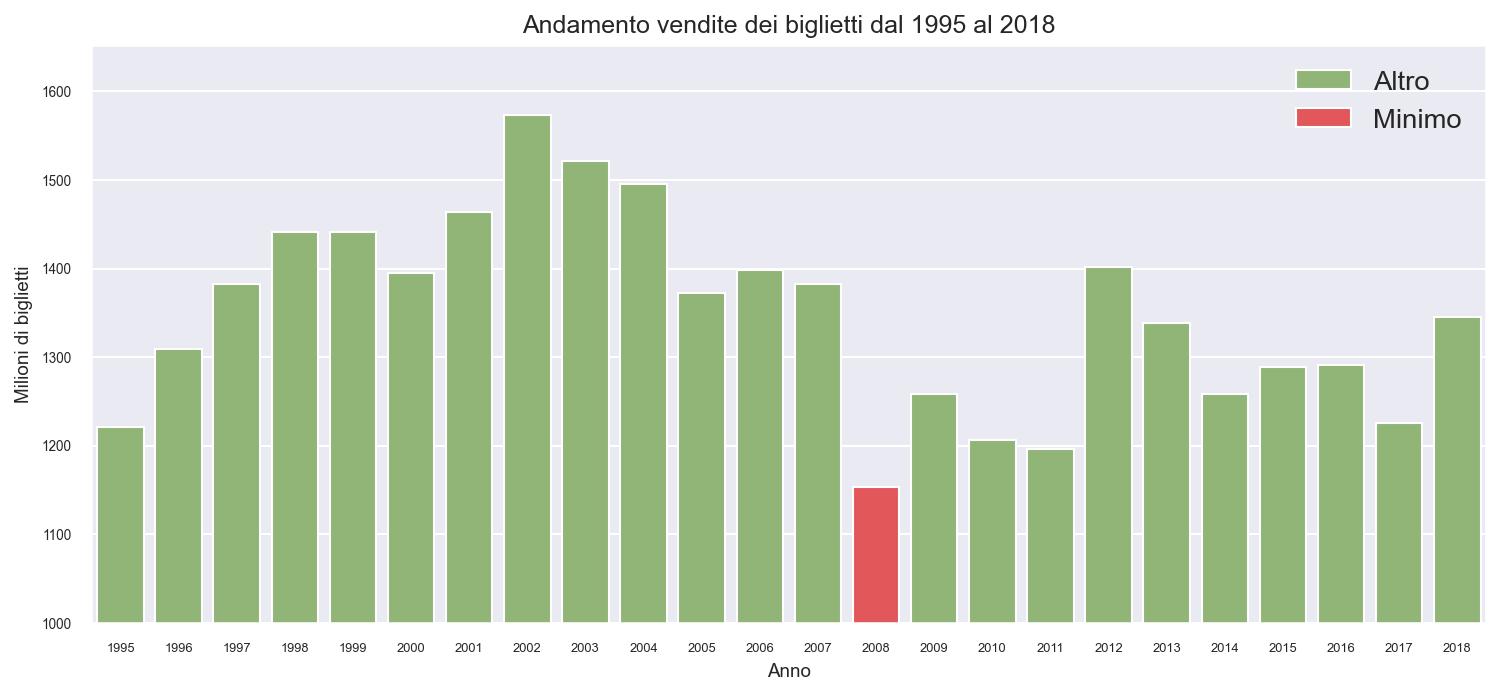

In [532]:
# Somma delle vendite globali per anno
somma_per_anno_film = mv.groupby('Year')['Tickets Sold'].sum()

min_sales = somma_per_anno_film.min()
min_year = somma_per_anno_film.idxmin()
# Definisco hue
hue_filtro_min = ['Minimo' if anno == min_year else 'Altro' for anno in somma_per_anno_film.index]
# Definisco la palette
palette_filtro_min = {'Minimo' : "#f94144", 'Altro' : "#90be6d"}

# Grafico
fig, ax = plt.subplots()
sns.barplot(x=somma_per_anno_film.index, y=somma_per_anno_film.values, palette=palette_filtro_min, hue=hue_filtro_min,legend=True, ax=ax)


# Personalizzazione delle etichette
ax.set_ylim(1000)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.ylabel("Milioni di biglietti", fontsize=9)
plt.xlabel("Anno", fontsize=9)
plt.title("Andamento vendite dei biglietti dal 1995 al 2018", fontsize=12)

plt.show()


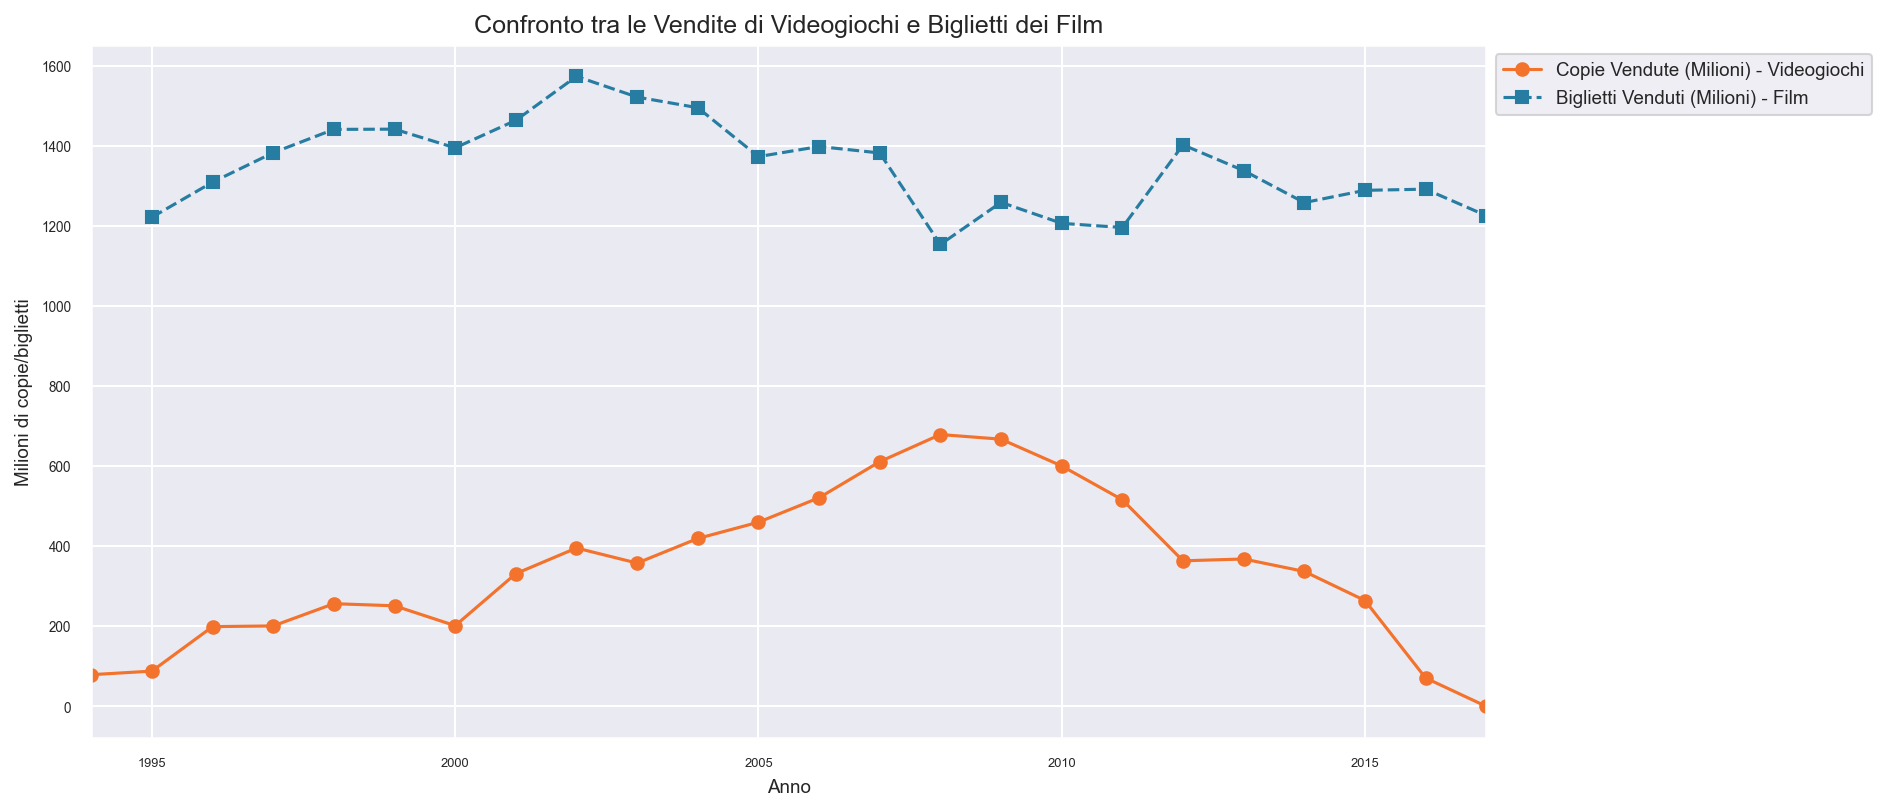

In [ ]:
# Sommo il numero di copie vendute per anno (videogiochi)
games_sales = vg.groupby("Year")["Global_Sales"].sum()

# Sommo il numero di biglietti venduti per anno (film)
movies_sales = mv.groupby("Year")["Tickets Sold"].sum()

# Grafico
plt.figure(figsize=(12,6))
plt.plot(games_sales, label="Copie Vendute (Milioni) - Videogiochi", marker='o', linestyle="-", color = "#f3722c")
plt.plot(movies_sales , label="Biglietti Venduti (Milioni) - Film", marker='s', linestyle="--", color = "#277da1")

# Personalizzazione delle etichette
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, frameon=True)
plt.xlabel("Anno",  fontsize=9)
plt.ylabel("Milioni di copie/biglietti", fontsize=9)
plt.title("Confronto tra le Vendite di Videogiochi e Biglietti dei Film", fontsize=12)
plt.grid(True)
plt.xlim(left=1994)
plt.xlim(right=2017)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)

plt.show()

In [505]:
# Creo un dataframe con le vendite totali per videogiochi e film
df_combined = pd.DataFrame({
    "Games Sales": somma_per_anno,
    "Movies Sales": somma_per_anno_film
}).dropna() 

a = df_combined["Movies Sales"].values
b = df_combined["Games Sales"].values

# Formato per la stampa
S = "{} Correlation: {:.3f} (p-value: {:.3e})"

# Pearson
corr_pearson = sp.stats.pearsonr(a, b)
print(S.format('Pearson', corr_pearson[0], corr_pearson[1]))
# Spearman
corr_spearman = sp.stats.spearmanr(a, b)
print( S.format('Spearman', corr_spearman[0], corr_spearman[1]) ) 
# Kendall
corr_kendall = sp.stats.kendalltau(a, b)
print( S.format('Kendall', corr_kendall[0], corr_kendall[1]) ) 
    


Pearson Correlation: -0.083 (p-value: 7.057e-01)
Spearman Correlation: -0.087 (p-value: 6.932e-01)
Kendall Correlation: -0.020 (p-value: 9.168e-01)


### Confronto sulla categoria action

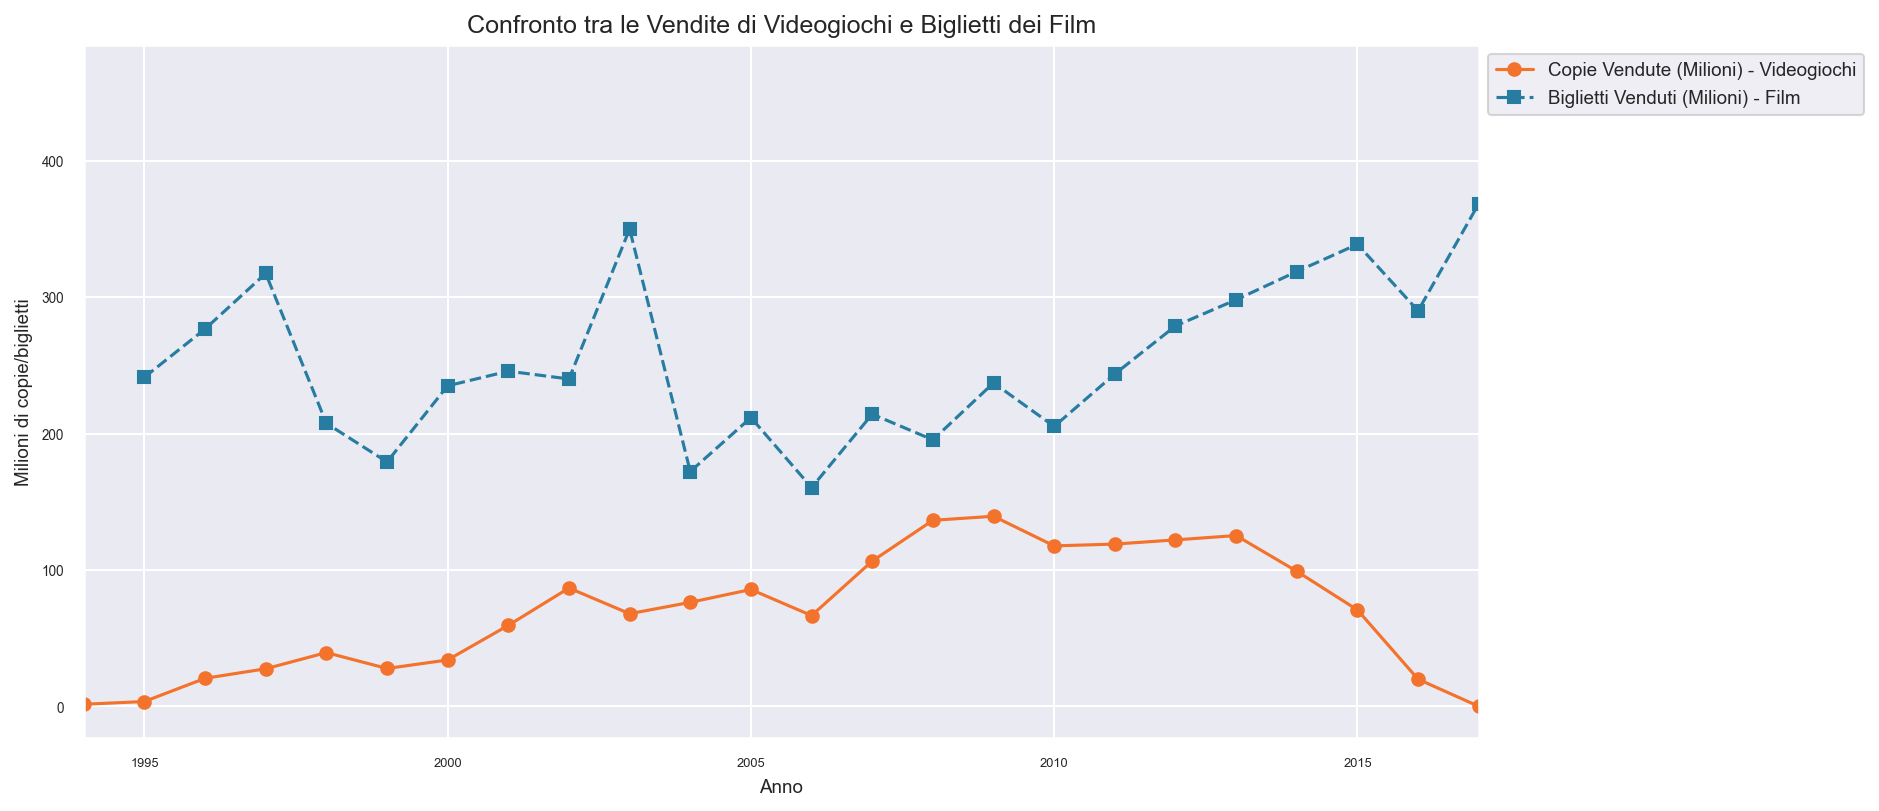

In [ ]:
# Filtra i videogiochi per il genere "Action" e somma le vendite per anno
somma_action_vg = vg[vg["Genre"] == "Action"].groupby("Year")["Global_Sales"].sum()

# Filtra i film per il genere "Action" e somma i biglietti venduti per anno
somma_action_film = mv[mv["Genre"] == "Action"].groupby("Year")["Tickets Sold"].sum()

# Creazione del grafico
plt.figure(figsize=(12,6))
plt.plot(somma_action_vg, label="Copie Vendute (Milioni) - Videogiochi", marker='o', linestyle="-", color = "#f3722c")
plt.plot(somma_action_film , label="Biglietti Venduti (Milioni) - Film", marker='s', linestyle="--", color = "#277da1")

# Personalizzazione delle etichette
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, frameon=True)
plt.xlabel("Anno", fontsize=9)
plt.ylabel("Milioni di copie/biglietti", fontsize=9)
plt.title("Confronto tra le Vendite di Videogiochi e Biglietti dei Film", fontsize=12)
plt.xlim(left=1994)
plt.xlim(right=2017)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)

plt.show()


In [539]:
# Creo dataframe con le vendite totali per videogiochi e film filtrati per genere Action
df_action = pd.DataFrame({
    "Games Sales Action": somma_action_vg,
    "Movies Sales Action": somma_action_film
}).dropna() 

# Ricavo i valori 
c = df_action["Games Sales Action"].values
d = df_action["Movies Sales Action"].values

# Formato per la stampa
S = "{} Correlation: {:.3f} (p-value: {:.2e})"

# Pearson
corr_pearson = sp.stats.pearsonr(c, d)
print(S.format('Pearson', corr_pearson[0], corr_pearson[1]))
# Spearman
corr_spearman = sp.stats.spearmanr(c, d)
print( S.format('Spearman', corr_spearman[0], corr_spearman[1]) ) 
# Kendall
corr_kendall = sp.stats.kendalltau(c, d)
print( S.format('Kendall', corr_kendall[0], corr_kendall[1]) ) 

Pearson Correlation: -0.218 (p-value: 3.174e-01)
Spearman Correlation: -0.200 (p-value: 3.612e-01)
Kendall Correlation: -0.130 (p-value: 4.023e-01)


## Conclusione  

**Generi più venduti:**  
Action, Sport, Shooter  
**Piattaforme più redditizie:**  
Sony, Nintendo  
**Annata migliore:**  
2008 (*Mario Kart Wii*, 35M copie)  
**Distribuzione regionale:**  
- NA: Shooter  
- EU: Shooter  
- JP: RPG  
- NA ed EU indicatori globali, in relazione tra loro  

**Confronto con il cinema:**  
Nessuna correlazione evidente  

### Cosa approfondire  
- Perché il 2008 ha registrato vendite così alte?  
- Relazioni tra le regioni e impatto sulle vendite  

